In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

X = dataset[features]
y = dataset['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Make predictions for the next 6 months
# Replace 'new_data' with the features of your new data
new_data = pd.DataFrame({
    'Quantity': [2, 3],
    'TotalAmount': [200, 75],
})

next_six_months_predictions = model.predict(new_data)
print('Predictions for the next 6 months:')
print(next_six_months_predictions)


Mean Absolute Error: 13.860000000000003
Predictions for the next 6 months:
[164.9  179.65]


Mean Absolute Error: 14.27
Predictions for the next 6 months:
[176.  180.5]


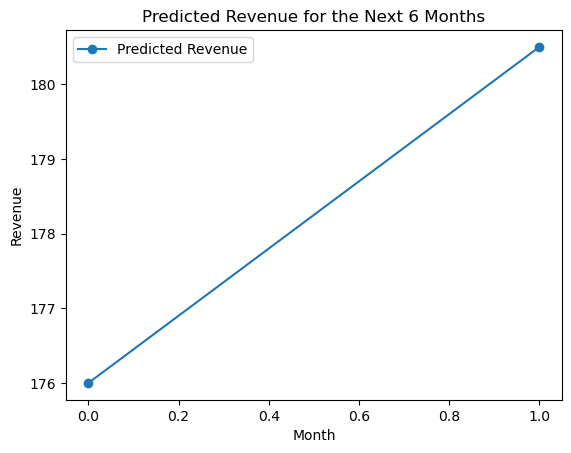

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

X = dataset[features]
y = dataset['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Make predictions for the next 6 months
# Replace 'new_data' with the features of your new data
new_data = pd.DataFrame({
    'Quantity': [2, 3],
    'TotalAmount': [200, 75],
})

next_six_months_predictions = model.predict(new_data)
print('Predictions for the next 6 months:')
print(next_six_months_predictions)

# Visualize predictions in a line graph
plt.plot(next_six_months_predictions, marker='o', label='Predicted Revenue')
plt.title('Predicted Revenue for the Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()


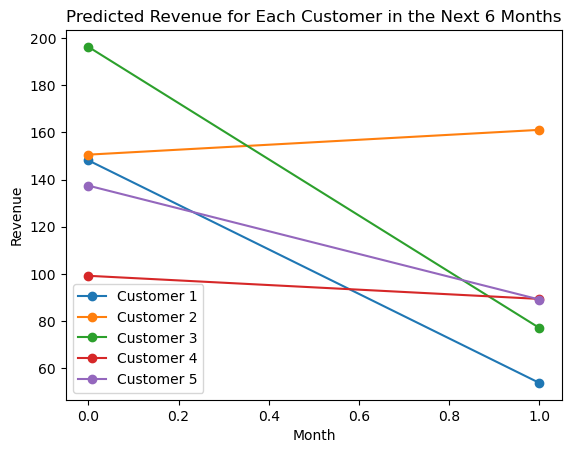

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Dictionary to store predictions for each customer
customer_predictions = {}

# Loop through unique customer IDs
for customer_id in dataset['CustomerID'].unique():
    # Filter data for the specific customer
    customer_data = dataset[dataset['CustomerID'] == customer_id]
    
    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': [2, 3],  # Replace with the quantities for the next 6 months
        'TotalAmount': [200, 75],  # Replace with the total amounts for the next 6 months
    })
    
    predictions = model.predict(new_data)
    
    # Store predictions in the dictionary
    customer_predictions[customer_id] = predictions

# Visualize predictions for each customer
for customer_id, predictions in customer_predictions.items():
    plt.plot(predictions, marker='o', label=f'Customer {customer_id}')

plt.title('Predicted Revenue for Each Customer in the Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Dictionary to store predictions for each customer
customer_predictions = {}

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(dataset['CustomerID'].unique()),
    value=dataset['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Function to update and display the plot based on the selected customer
def update_plot(selected_customer):
    plt.clf()  # Clear previous plot
    
    # Filter data for the specific customer
    customer_data = dataset[dataset['CustomerID'] == selected_customer]
    
    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': [2, 3],  # Replace with the quantities for the next 6 months
        'TotalAmount': [200, 75],  # Replace with the total amounts for the next 6 months
    })
    
    predictions = model.predict(new_data)
    
    # Store predictions in the dictionary
    customer_predictions[selected_customer] = predictions
    
    # Visualize predictions for the selected customer
    for customer_id, predictions in customer_predictions.items():
        plt.plot(predictions, marker='o', label=f'Customer {customer_id}')

    plt.title('Predicted Revenue for Each Customer in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown)


interactive(children=(Dropdown(description='Select Customer:', options=(1, 2, 3, 4, 5), value=1), Output()), _…

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(dataset['CustomerID'].unique()),
    value=dataset['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Function to update and display the plot based on the selected customer
def update_plot(selected_customer):
    plt.clf()  # Clear previous plot

    # Filter data for the specific customer
    customer_data = dataset[dataset['CustomerID'] == selected_customer]

    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']

    # Train the model
    model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = model.predict(new_data)

    # Visualize predictions for the selected customer
    plt.plot(predictions, marker='o', label=f'Customer {selected_customer}')

    plt.title(f'Predicted Revenue for Customer {selected_customer} in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown)


interactive(children=(Dropdown(description='Select Customer:', options=(1, 2, 3, 4, 5), value=1), Output()), _…

In [6]:
dataset.head()

,CustomerID,CustomerName,CustomerEmail,ProductID,ProductName,Category,PurchaseID,PurchaseDate,Quantity,TotalAmount,Revenue
0,1,John Doe,john.doe@email.com,101,Laptop,Electronics,1,2023-01-15,2,2000,4000
1,2,Jane Smith,jane.smith@email.com,102,T-Shirt,Clothing,2,2023-02-02,3,75,225
2,3,Bob Johnson,bob.johnson@email.com,103,Smartphone,Electronics,3,2023-03-10,1,800,800
3,1,John Doe,john.doe@email.com,104,Running Shoes,Footwear,4,2023-04-05,1,120,120
4,4,Alice Brown,alice.brown@email.com,105,Headphones,Electronics,5,2023-05-20,2,50,100


In [7]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
dataset = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Feature selection - Assuming 'Quantity' and 'TotalAmount' are relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount
dataset['Revenue'] = dataset['Quantity'] * dataset['TotalAmount']

# Initialize the Huber Regressor
model = HuberRegressor()

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(dataset['CustomerID'].unique()),
    value=dataset['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Function to update and display the plot based on the selected customer
def update_plot(selected_customer):
    plt.clf()  # Clear previous plot

    # Filter data for the specific customer
    customer_data = dataset[dataset['CustomerID'] == selected_customer]

    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']

    # Train the model
    model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = model.predict(new_data)

    # Visualize predictions for the selected customer
    plt.plot(predictions, marker='o', label=f'Customer {selected_customer}')

    plt.title(f'Predicted Revenue for Customer {selected_customer} in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown)


interactive(children=(Dropdown(description='Select Customer:', options=(1, 2, 3, 4, 5), value=1), Output()), _…

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import cross_val_score

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'uploaded_data.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['CustomerID'].unique()),
    value=uploaded_data['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Function to update and display the plot based on the selected customer
def update_plot(selected_customer):
    plt.clf()  # Clear previous plot

    # Filter data for the specific customer
    customer_data = uploaded_data[uploaded_data['CustomerID'] == selected_customer]

    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']

    # Train the best model
    best_model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)

    # Visualize predictions for the selected customer
    plt.plot(predictions, marker='o', label=f'Customer {selected_customer}')

    plt.title(f'Predicted Revenue for Customer {selected_customer} in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown)


Cross-validated R^2 scores:
Huber Regressor: 0.32496029673706617
Passive Aggressive Regressor: -0.1861534661261434
K Neighbors Regressor: 0.6016785090687005

The best model for the uploaded data is: K Neighbors Regressor with R^2 score: 0.6016785090687005


interactive(children=(Dropdown(description='Select Customer:', options=(1, 2, 3, 4, 5), value=1), Output()), _…

Cross-validated R^2 scores:
Huber Regressor: 0.32496029673706617
Passive Aggressive Regressor: 0.8282870937561035
K Neighbors Regressor: 0.6016785090687005

The best model for the uploaded data is: Passive Aggressive Regressor with R^2 score: 0.8282870937561035


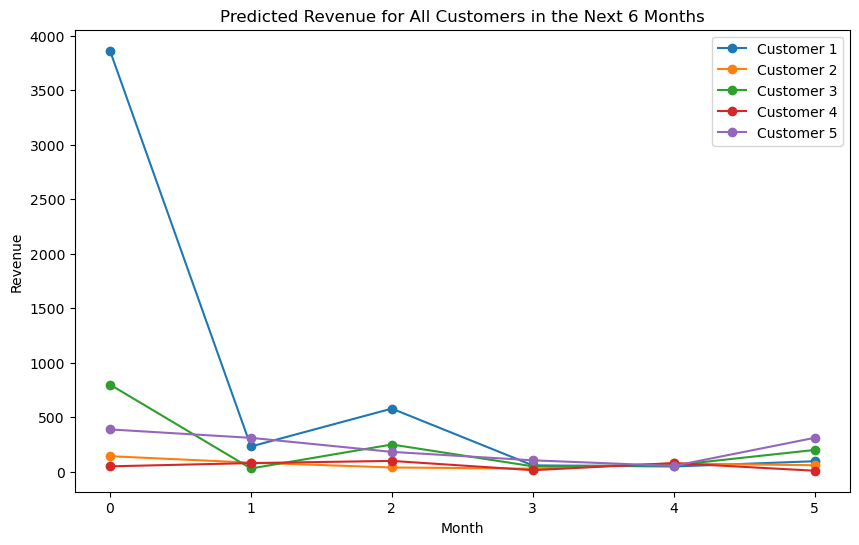

In [14]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['CustomerID'].unique()),
    value=uploaded_data['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Function to update and display the plot based on the selected customer
def update_plot(selected_customer):
    plt.clf()  # Clear previous plot

    # Filter data for the specific customer
    customer_data = uploaded_data[uploaded_data['CustomerID'] == selected_customer]

    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']

    # Train the best model
    best_model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)

    # Visualize predictions for the selected customer
    plt.plot(predictions, marker='o', label=f'Customer {selected_customer}')

    plt.title(f'Predicted Revenue for Customer {selected_customer} in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown)

# Aggregating predictions for all customers over the next 6 months
max_months = 6  # Maximum months for prediction
all_customers_predictions = pd.DataFrame(index=range(max_months))

for customer in uploaded_data['CustomerID'].unique():
    customer_data = uploaded_data[uploaded_data['CustomerID'] == customer]
    X = customer_data[features]
    y = customer_data['Revenue']
    best_model.fit(X, y)

    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)[:max_months]  # Limit predictions to max_months
    all_customers_predictions[f'Customer {customer}'] = predictions.tolist() + [None] * (max_months - len(predictions))

# Plotting revenue against month for all customers
plt.figure(figsize=(10, 6))
plt.plot(all_customers_predictions, marker='o')
plt.title('Predicted Revenue for All Customers in the Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(all_customers_predictions.columns)
plt.show()



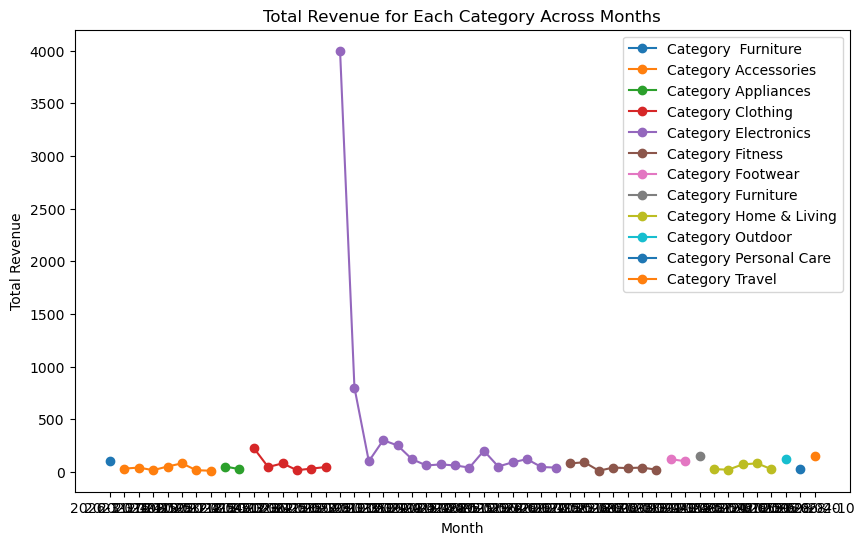

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Assuming the dataset has columns like 'Category', 'PurchaseDate', 'Quantity', and 'TotalAmount'
# Calculate 'Revenue' as the product of 'Quantity' and 'TotalAmount'
uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Group by 'Category' and 'PurchaseDate', summing the 'Revenue' for each group
category_month_revenue = uploaded_data.groupby(['Category', 'PurchaseDate'])['Revenue'].sum().reset_index()

# Plotting total revenue against month for each category
plt.figure(figsize=(10, 6))
for category in category_month_revenue['Category'].unique():
    category_data = category_month_revenue[category_month_revenue['Category'] == category]
    plt.plot(category_data['PurchaseDate'], category_data['Revenue'], marker='o', label=f'Category {category}')

plt.title('Total Revenue for Each Category Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()


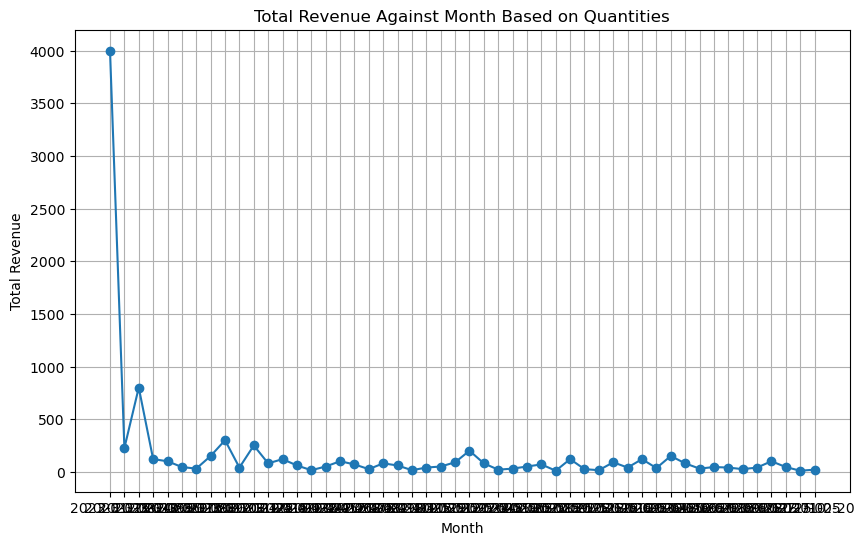

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Assuming your dataset has columns like 'Month', 'Quantity', and 'TotalAmount'
# Create a new column 'Revenue' by multiplying 'Quantity' and 'TotalAmount'
uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Group by 'Month' and sum the 'Revenue' for each month
monthly_revenue = uploaded_data.groupby('PurchaseDate')['Revenue'].sum().reset_index()

# Plotting total revenue against month based on quantities
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['PurchaseDate'], monthly_revenue['Revenue'], marker='o')
plt.title('Total Revenue Against Month Based on Quantities')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a customer
customer_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['CustomerID'].unique()),
    value=uploaded_data['CustomerID'].unique()[0],
    description='Select Customer:',
)

# Slider widget for selecting the number of months for prediction
months_slider = widgets.IntSlider(
    value=6,
    min=1,
    max=9,
    step=1,
    description='Months for Prediction:',
    continuous_update=False
)

# Function to update and display the plot based on the selected customer and month range
def update_plot(selected_customer, max_months):
    plt.clf()  # Clear previous plot

    # Filter data for the specific customer
    customer_data = uploaded_data[uploaded_data['CustomerID'] == selected_customer]

    # Use only relevant features
    X = customer_data[features]
    y = customer_data['Revenue']

    # Train the best model
    best_model.fit(X, y)

    # Make predictions for the selected number of months
    new_data = pd.DataFrame({
        'Quantity': customer_data['Quantity'].values,
        'TotalAmount': customer_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)[:max_months]

    # Visualize predictions for the selected customer
    plt.plot(predictions, marker='o', label=f'Customer {selected_customer}')

    plt.title(f'Predicted Revenue for Customer {selected_customer} in the Next {max_months} Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown and slider to the update function
widgets.interactive(update_plot, selected_customer=customer_dropdown, max_months=months_slider)


Cross-validated R^2 scores:
Huber Regressor: 0.32496029673706617
Passive Aggressive Regressor: 0.8133936034730926
K Neighbors Regressor: 0.6016785090687005

The best model for the uploaded data is: Passive Aggressive Regressor with R^2 score: 0.8133936034730926


interactive(children=(Dropdown(description='Select Customer:', options=(1, 2, 3, 4, 5), value=1), IntSlider(va…

In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('your_dataset.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Aggregate revenue by category
category_revenue = uploaded_data.groupby('Category')['Revenue'].sum().reset_index()

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation for each category
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a category
category_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['Category'].unique()),
    value=uploaded_data['Category'].unique()[0],
    description='Select Category:',
)

# Function to update and display the plot based on the selected category
def update_plot(selected_category):
    plt.clf()  # Clear previous plot

    # Filter data for the selected category
    category_data = uploaded_data[uploaded_data['Category'] == selected_category]

    # Use only relevant features
    X = category_data[features]
    y = category_data['Revenue']

    # Train the best model for the selected category
    best_model.fit(X, y)

    # Make predictions for the selected category
    new_data = pd.DataFrame({
        'Quantity': category_data['Quantity'].values,
        'TotalAmount': category_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)

    # Visualize predictions for the selected category
    plt.plot(predictions, marker='o', label=f'Category {selected_category}')

    plt.title(f'Predicted Revenue for Category {selected_category}')
    plt.xlabel('User')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_category=category_dropdown)


Cross-validated R^2 scores:
Huber Regressor: 0.32496029673706617
Passive Aggressive Regressor: 0.8903938885032737
K Neighbors Regressor: 0.6016785090687005

The best model for the uploaded data is: Passive Aggressive Regressor with R^2 score: 0.8903938885032737


interactive(children=(Dropdown(description='Select Category:', index=4, options=(' Furniture', 'Accessories', …

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('customer_purchase_data_1.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Aggregate revenue by category
category_revenue = uploaded_data.groupby('Category')['Revenue'].sum().reset_index()

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation for each category
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a category
category_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['Category'].unique()),
    value=uploaded_data['Category'].unique()[0],
    description='Select Category:',
)

# Function to update and display the plot based on the selected category
def update_plot(selected_category):
    plt.clf()  # Clear previous plot

    # Filter data for the selected category
    category_data = uploaded_data[uploaded_data['Category'] == selected_category]

    if len(category_data) < 5:
        print("Not enough samples in the selected category for prediction.")
        return

    # Use only relevant features
    X = category_data[features]
    y = category_data['Revenue']

    # Train the best model for the selected category
    best_model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': category_data['Quantity'].values,
        'TotalAmount': category_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)[:6]  # Limit predictions to next 6 months

    # Visualize predictions for the selected category
    plt.plot(range(1, 7), predictions, marker='o', label=f'Category {selected_category}')

    plt.title(f'Predicted Revenue for Category {selected_category} in the Next 6 Months')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdown to the update function
widgets.interactive(update_plot, selected_category=category_dropdown)


Cross-validated R^2 scores:
Huber Regressor: 0.873573399753804
Passive Aggressive Regressor: 0.3128420069923539
K Neighbors Regressor: 0.999999991200119

The best model for the uploaded data is: K Neighbors Regressor with R^2 score: 0.999999991200119


interactive(children=(Dropdown(description='Select Category:', index=2, options=('Beauty', 'Books', 'Clothing'…

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load the user-uploaded dataset into 'uploaded_data'
# Replace 'your_dataset.csv' with the user-uploaded dataset filename
uploaded_data = pd.read_csv('customer_purchase_data_1.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Aggregate revenue by category
category_revenue = uploaded_data.groupby('Category')['Revenue'].sum().reset_index()

# Initialize models
huber_model = HuberRegressor()
pa_model = PassiveAggressiveRegressor()
knn_model = KNeighborsRegressor()

models = {
    'Huber Regressor': huber_model,
    'Passive Aggressive Regressor': pa_model,
    'K Neighbors Regressor': knn_model
}

# Evaluation using cross-validation for each category
results = {}
for model_name, model in models.items():
    X = uploaded_data[features]
    y = uploaded_data['Revenue']

    # Perform 5-fold cross-validation and calculate mean of R^2 scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    results[model_name] = mean_score

# Find the best model based on mean cross-validated R^2 scores
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_score = results[best_model_name]

print("Cross-validated R^2 scores:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model for the uploaded data is: {best_model_name} with R^2 score: {best_score}")

# Dropdown widget for selecting a category
category_dropdown = widgets.Dropdown(
    options=sorted(uploaded_data['Category'].unique()),
    value=uploaded_data['Category'].unique()[0],
    description='Select Category:',
)

# Dropdown widget for selecting the type of plot
plot_type_dropdown = widgets.Dropdown(
    options=['line', 'bar', 'pie'],  # Add more plot types as needed
    value='line',
    description='Select Plot Type:',
)

# Function to update and display the plot based on the selected category and plot type
def update_plot(selected_category, plot_type):
    plt.clf()  # Clear previous plot

    # Filter data for the selected category
    category_data = uploaded_data[uploaded_data['Category'] == selected_category]

    if len(category_data) < 5:
        print("Not enough samples in the selected category for prediction.")
        return

    # Use only relevant features
    X = category_data[features]
    y = category_data['Revenue']

    # Train the best model for the selected category
    best_model.fit(X, y)

    # Make predictions for the next 6 months
    new_data = pd.DataFrame({
        'Quantity': category_data['Quantity'].values,
        'TotalAmount': category_data['TotalAmount'].values,
    })

    predictions = best_model.predict(new_data)[:6]  # Limit predictions to next 6 months

    # Plot based on the selected plot type
    if plot_type == 'line':
        plt.plot(range(1, 7), predictions, marker='o', label=f'Category {selected_category}')
    elif plot_type == 'bar':
        plt.bar(range(1, 7), predictions, label=f'Category {selected_category}')
    elif plot_type == 'pie':
        plt.pie(predictions, labels=range(1, 7), autopct='%1.1f%%')
        plt.title(f'Predicted Revenue Distribution for Category {selected_category} in the Next 6 Months')

    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdowns to the update function
widgets.interactive(update_plot, selected_category=category_dropdown, plot_type=plot_type_dropdown)


Cross-validated R^2 scores:
Huber Regressor: 0.873573399753804
Passive Aggressive Regressor: 0.11842247506822487
K Neighbors Regressor: 0.999999991200119

The best model for the uploaded data is: K Neighbors Regressor with R^2 score: 0.999999991200119


interactive(children=(Dropdown(description='Select Category:', index=2, options=('Beauty', 'Books', 'Clothing'…

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib  # Import joblib for model serialization

# Load the user-uploaded dataset into 'uploaded_data'
uploaded_data = pd.read_csv('customer_purchase_data_1.csv')

# Feature selection - Assuming relevant features
features = ['Quantity', 'TotalAmount']
target = 'Revenue'

# Create a target variable ('Revenue') based on Quantity * TotalAmount if not present
if 'Revenue' not in uploaded_data.columns:
    uploaded_data['Revenue'] = uploaded_data['Quantity'] * uploaded_data['TotalAmount']

# Split the data into training and testing sets
X = uploaded_data[features]
y = uploaded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K Neighbors Regressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Data: {mse}")

# Save the trained model using joblib
joblib.dump(knn_model, 'cPP.pkl')


Mean Squared Error on Test Data: 0.011492067593039688


['cPP.pkl']

In [7]:
import pandas as pd
import joblib  # Import joblib for model deserialization

# Load the test dataset
test_data = pd.read_csv('your_dataset.csv')

# Assuming the test dataset has similar columns 'Quantity' and 'TotalAmount' as the training data
test_features = test_data[['Quantity', 'TotalAmount']]

# Load the trained model
loaded_model = joblib.load('cPP.pkl')

# Make predictions using the loaded model on the test dataset
predictions = loaded_model.predict(test_features)

# View the predictions
print(predictions)


[1599.974  224.94   999.982  119.986  100.04    45.      29.996  149.962
  300.006   39.98   250.002   79.998  119.986   59.964   14.962   50.056
   99.99    70.028   24.996   80.1     60.014   14.962   39.998   50.056
   89.76   200.014   79.998   20.016   29.968   50.056   70.016   10.11
  119.986   24.996   14.962   90.044   39.998  119.98    35.044  149.962
   79.998   29.996   45.      39.98    24.996   39.998   99.99    44.946
   10.11    20.016]


In [8]:
import pandas as pd
import joblib  # Import joblib for model deserialization
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ... (your existing code for loading data, defining models, and widgets)

# Function to make predictions with the loaded model
def make_predictions(test_data):
    test_features = test_data[['Quantity', 'TotalAmount']]
    loaded_model = joblib.load('cPP.pkl')  # Load the trained model
    predictions = loaded_model.predict(test_features)
    return predictions

# Dropdown widget for selecting the type of plot
plot_type_dropdown = widgets.Dropdown(
    options=['line', 'bar', 'pie'],  # Add more plot types as needed
    value='line',
    description='Select Plot Type:',
)

# Function to update and display the plot based on the selected category and plot type
def update_plot(selected_category, plot_type):
    plt.clf()  # Clear previous plot

    # Filter data for the selected category
    category_data = uploaded_data[uploaded_data['Category'] == selected_category]

    if len(category_data) < 5:
        print("Not enough samples in the selected category for prediction.")
        return

    # Use only relevant features
    X = category_data[features]
    y = category_data['Revenue']

    # Train the best model for the selected category
    best_model.fit(X, y)

    # Make predictions for the next 6 months using the function
    new_data = pd.DataFrame({
        'Quantity': category_data['Quantity'].values,
        'TotalAmount': category_data['TotalAmount'].values,
    })

    predictions = make_predictions(new_data)[:6]  # Limit predictions to next 6 months

    # Plot based on the selected plot type
    if plot_type == 'line':
        plt.plot(range(1, 7), predictions, marker='o', label=f'Category {selected_category}')
    elif plot_type == 'bar':
        plt.bar(range(1, 7), predictions, label=f'Category {selected_category}')
    elif plot_type == 'pie':
        plt.pie(predictions, labels=range(1, 7), autopct='%1.1f%%')
        plt.title(f'Predicted Revenue Distribution for Category {selected_category} in the Next 6 Months')

    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

# Connect the dropdowns to the update function
widgets.interactive(update_plot, selected_category=category_dropdown, plot_type=plot_type_dropdown)


interactive(children=(Dropdown(description='Select Category:', index=4, options=('Beauty', 'Books', 'Clothing'…